In [ ]:
import ipywidgets as widgets
from IPython.display import display
import os

box_layout = widgets.Layout(
    display="flex",
    flex_flow="column",
    align_items="center",
    border="1px solid #E0E0E0",
    width="400px",
    padding="25px",
    border_radius="10px"
)

button_layout = widgets.Layout(width="100%", height="40px")

upload_layout = widgets.Layout(width="100%")

title = widgets.HTML(
    "<h3 style='margin-bottom:10px;'>Upload CSV Files 👇</h3>"
)

subtitle = widgets.HTML(
    "<p style='color:gray; margin-top:0;'>Select one or more CSV files to upload and save</p>"
)

train_uploader = widgets.FileUpload(
    accept='.csv',
    multiple=True,
    layout=upload_layout
)

save_button = widgets.Button(
    description='Save Files',
    button_style='primary',
    icon='save',
    layout=button_layout
)

status = widgets.HTML("<p style='color:gray;'>Waiting for upload...</p>")

output = widgets.Output()

def save_files(change=None):
    with output:
        output.clear_output()
        
        if train_uploader.value:
            saved_files = []
            for filename, file_info in train_uploader.value.items():
                with open(filename, "wb") as f:
                    f.write(file_info['content'])
                saved_files.append(filename)
            
            status.value = f"<p style='color:green;'>Saved {len(saved_files)} file(s) 👍</p>"
        else:
            status.value = "<p style='color:red;'>⚠️ No files uploaded yet</p>"

train_uploader.observe(save_files, names='value')

save_button.on_click(save_files)

card = widgets.VBox(
    [title, subtitle, train_uploader, save_button, status],
    layout=box_layout
)

display(card)
display(output)

Output()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('file.csv')

In [4]:
df.sample(4)

,Age,Fare,Family,Survived
418,30.0,NaN,0,0
786,18.0,7.4958,0,1
127,24.0,7.1417,0,1
164,1.0,39.6875,5,0


In [5]:
df.isnull().sum()

,0
Age,177
Fare,45
Family,0
Survived,0


In [6]:
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


In [7]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 50
)

### **Mean median imputation**

In [11]:
mean_age = xtrain['Age'].mean()
median_age = xtrain['Age'].median()

mean_Fare = xtrain['Fare'].mean()
median_Fare = xtrain['Fare'].median()

In [12]:
xtrain['age_median'] = xtrain['Age'].fillna(median_age)
xtrain['age_mean'] = xtrain['Age'].fillna(mean_age)

xtrain['fare_median'] = xtrain['Fare'].fillna(median_Fare)
xtrain['fare_mean'] = xtrain['Fare'].fillna(mean_Fare)

In [15]:
xtrain.sample(4)

,Age,Fare,Family,age_median,age_mean,fare_median,fare_mean
403,28.0,15.8500,1,28.0,28.000000,15.8500,15.8500
561,40.0,7.8958,0,40.0,40.000000,7.8958,7.8958
468,NaN,7.7250,0,29.0,30.236608,7.7250,7.7250
6,54.0,51.8625,0,54.0,54.000000,51.8625,51.8625


In [17]:
xtrain.isnull().mean()*100

,0
Age,20.505618
Fare,4.915730
Family,0.000000
age_median,0.000000
age_mean,0.000000
fare_median,0.000000
fare_mean,0.000000


### **Chnages in variance**

In [19]:
print(f'''Age
Original: {xtrain['Age'].var()}
After mean imputation: {xtrain['age_mean'].var()}
After median imputation: {xtrain['age_median'].var()}

Fare
Original: {xtrain['Fare'].var()}
After mean imputation: {xtrain['fare_mean'].var()}
After median imputation: {xtrain['fare_median'].var()}
''')

Age
Original: 209.3580097113735
After mean imputation: 166.3674760716258
After median imputation: 166.61709851925553

Fare
Original: 2515.279960607071
After mean imputation: 2391.4616784393534
After median imputation: 2406.9533047682903



### **Chnages in Distribution**

<Axes: xlabel='Age', ylabel='Density'>

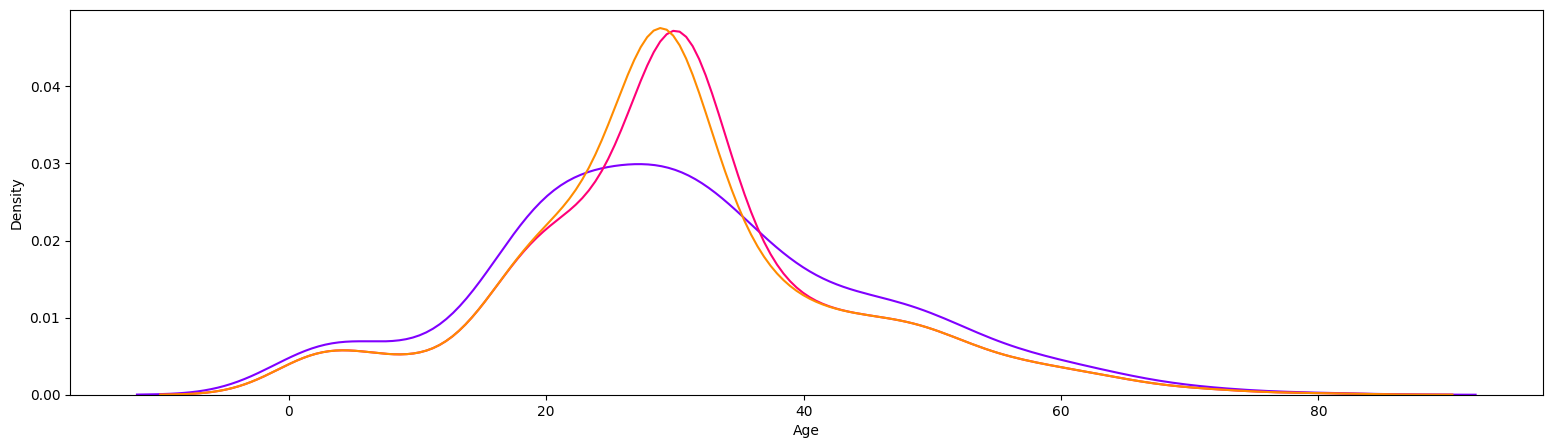

In [40]:
import seaborn as sb
import matplotlib.pyplot as plot
fig = plot.figure(figsize=(19, 5))
# Original
sb.kdeplot(data=xtrain['Age'], color="#8000ff")
# Mean imputation
sb.kdeplot(data=xtrain['age_mean'], color="#ff0077")
# Median imputation
sb.kdeplot(data=xtrain['age_median'], color="#ff8c00")

#### **Above graph shows a large change in shape of distribution**

Result: negative

<Axes: xlabel='Fare', ylabel='Density'>

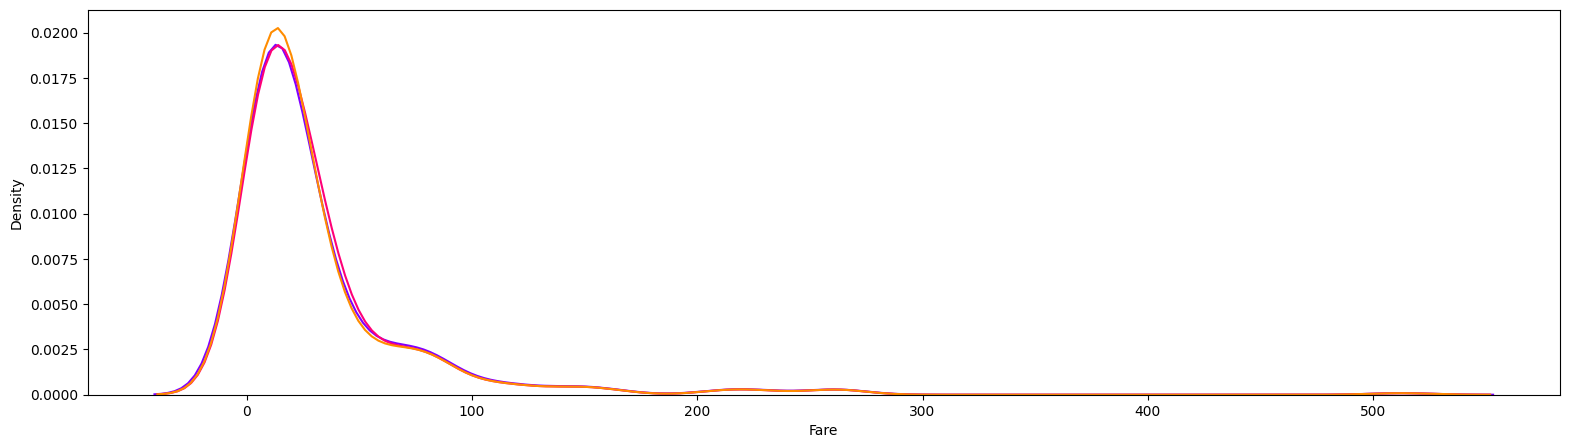

In [41]:
fig = plot.figure(figsize=(19, 5))
# Original
sb.kdeplot(data=xtrain['Fare'], color="#8000ff")
# Mean imputation
sb.kdeplot(data=xtrain['fare_mean'], color="#ff0077")
# Median imputation
sb.kdeplot(data=xtrain['fare_median'], color="#ff8c00")

#### **Above graph shows a little to no change in shape of distribution**

- Result: good

In [42]:
xtrain.cov()

,Age,Fare,Family,age_median,age_mean,fare_median,fare_mean
Age,209.358010,87.895684,-6.442801,209.358010,209.358010,83.458976,83.254567
Fare,87.895684,2515.279961,17.850997,71.845184,69.584069,2515.279961,2515.279961
Family,-6.442801,17.850997,2.602751,-5.084699,-5.119807,16.971466,16.972256
age_median,209.358010,71.845184,-5.084699,166.617099,166.367476,68.402053,68.308501
age_mean,209.358010,69.584069,-5.119807,166.367476,166.367476,66.321127,66.158693
fare_median,83.458976,2515.279961,16.971466,68.402053,66.321127,2406.953305,2391.461678
fare_mean,83.254567,2515.279961,16.972256,68.308501,66.158693,2391.461678,2391.461678


In [43]:
xtrain.corr()

,Age,Fare,Family,age_median,age_mean,fare_median,fare_mean
Age,1.000000,0.113162,-0.303094,1.000000,1.000000,0.110837,0.110993
Fare,0.113162,1.000000,0.218185,0.110355,0.106964,1.000000,1.000000
Family,-0.303094,0.218185,1.000000,-0.244168,-0.246038,0.214422,0.215125
age_median,1.000000,0.110355,-0.244168,1.000000,0.999251,0.108013,0.108214
age_mean,1.000000,0.106964,-0.246038,0.999251,1.000000,0.104805,0.104887
fare_median,0.110837,1.000000,0.214422,0.108013,0.104805,1.000000,0.996777
fare_mean,0.110993,1.000000,0.215125,0.108214,0.104887,0.996777,1.000000


<Axes: >

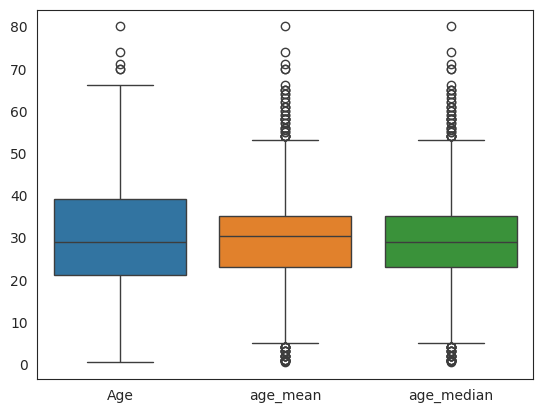

In [65]:
sb.set_style('white')
sb.boxplot(data=xtrain[['Age', 'age_mean', 'age_median']])

Outliers increased with mean and median imputation